# Downloading necessary python libraries

In [1]:
!pip install xgboost

# Importing libraries

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from Google Drive

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CDSAML_P13/NY.csv",low_memory=False)
df.head()

<ipython-input-3-4bdbffd8a114>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/CDSAML_P13/NY.csv")


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346931 entries, 0 to 2346930
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [5]:
df.nunique()

Health Service Area                          8
Hospital County                             57
Operating Certificate Number               179
Facility Id                                213
Facility Name                              224
Age Group                                    5
Zip Code - 3 digits                         50
Gender                                       3
Race                                         4
Ethnicity                                    4
Length of Stay                             221
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         263
CCS Diagnosis Description                  263
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code                                26
APR MDC Descr

In [6]:
df.isna().sum()

Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      35816
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [7]:
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

# Plotting Graphs

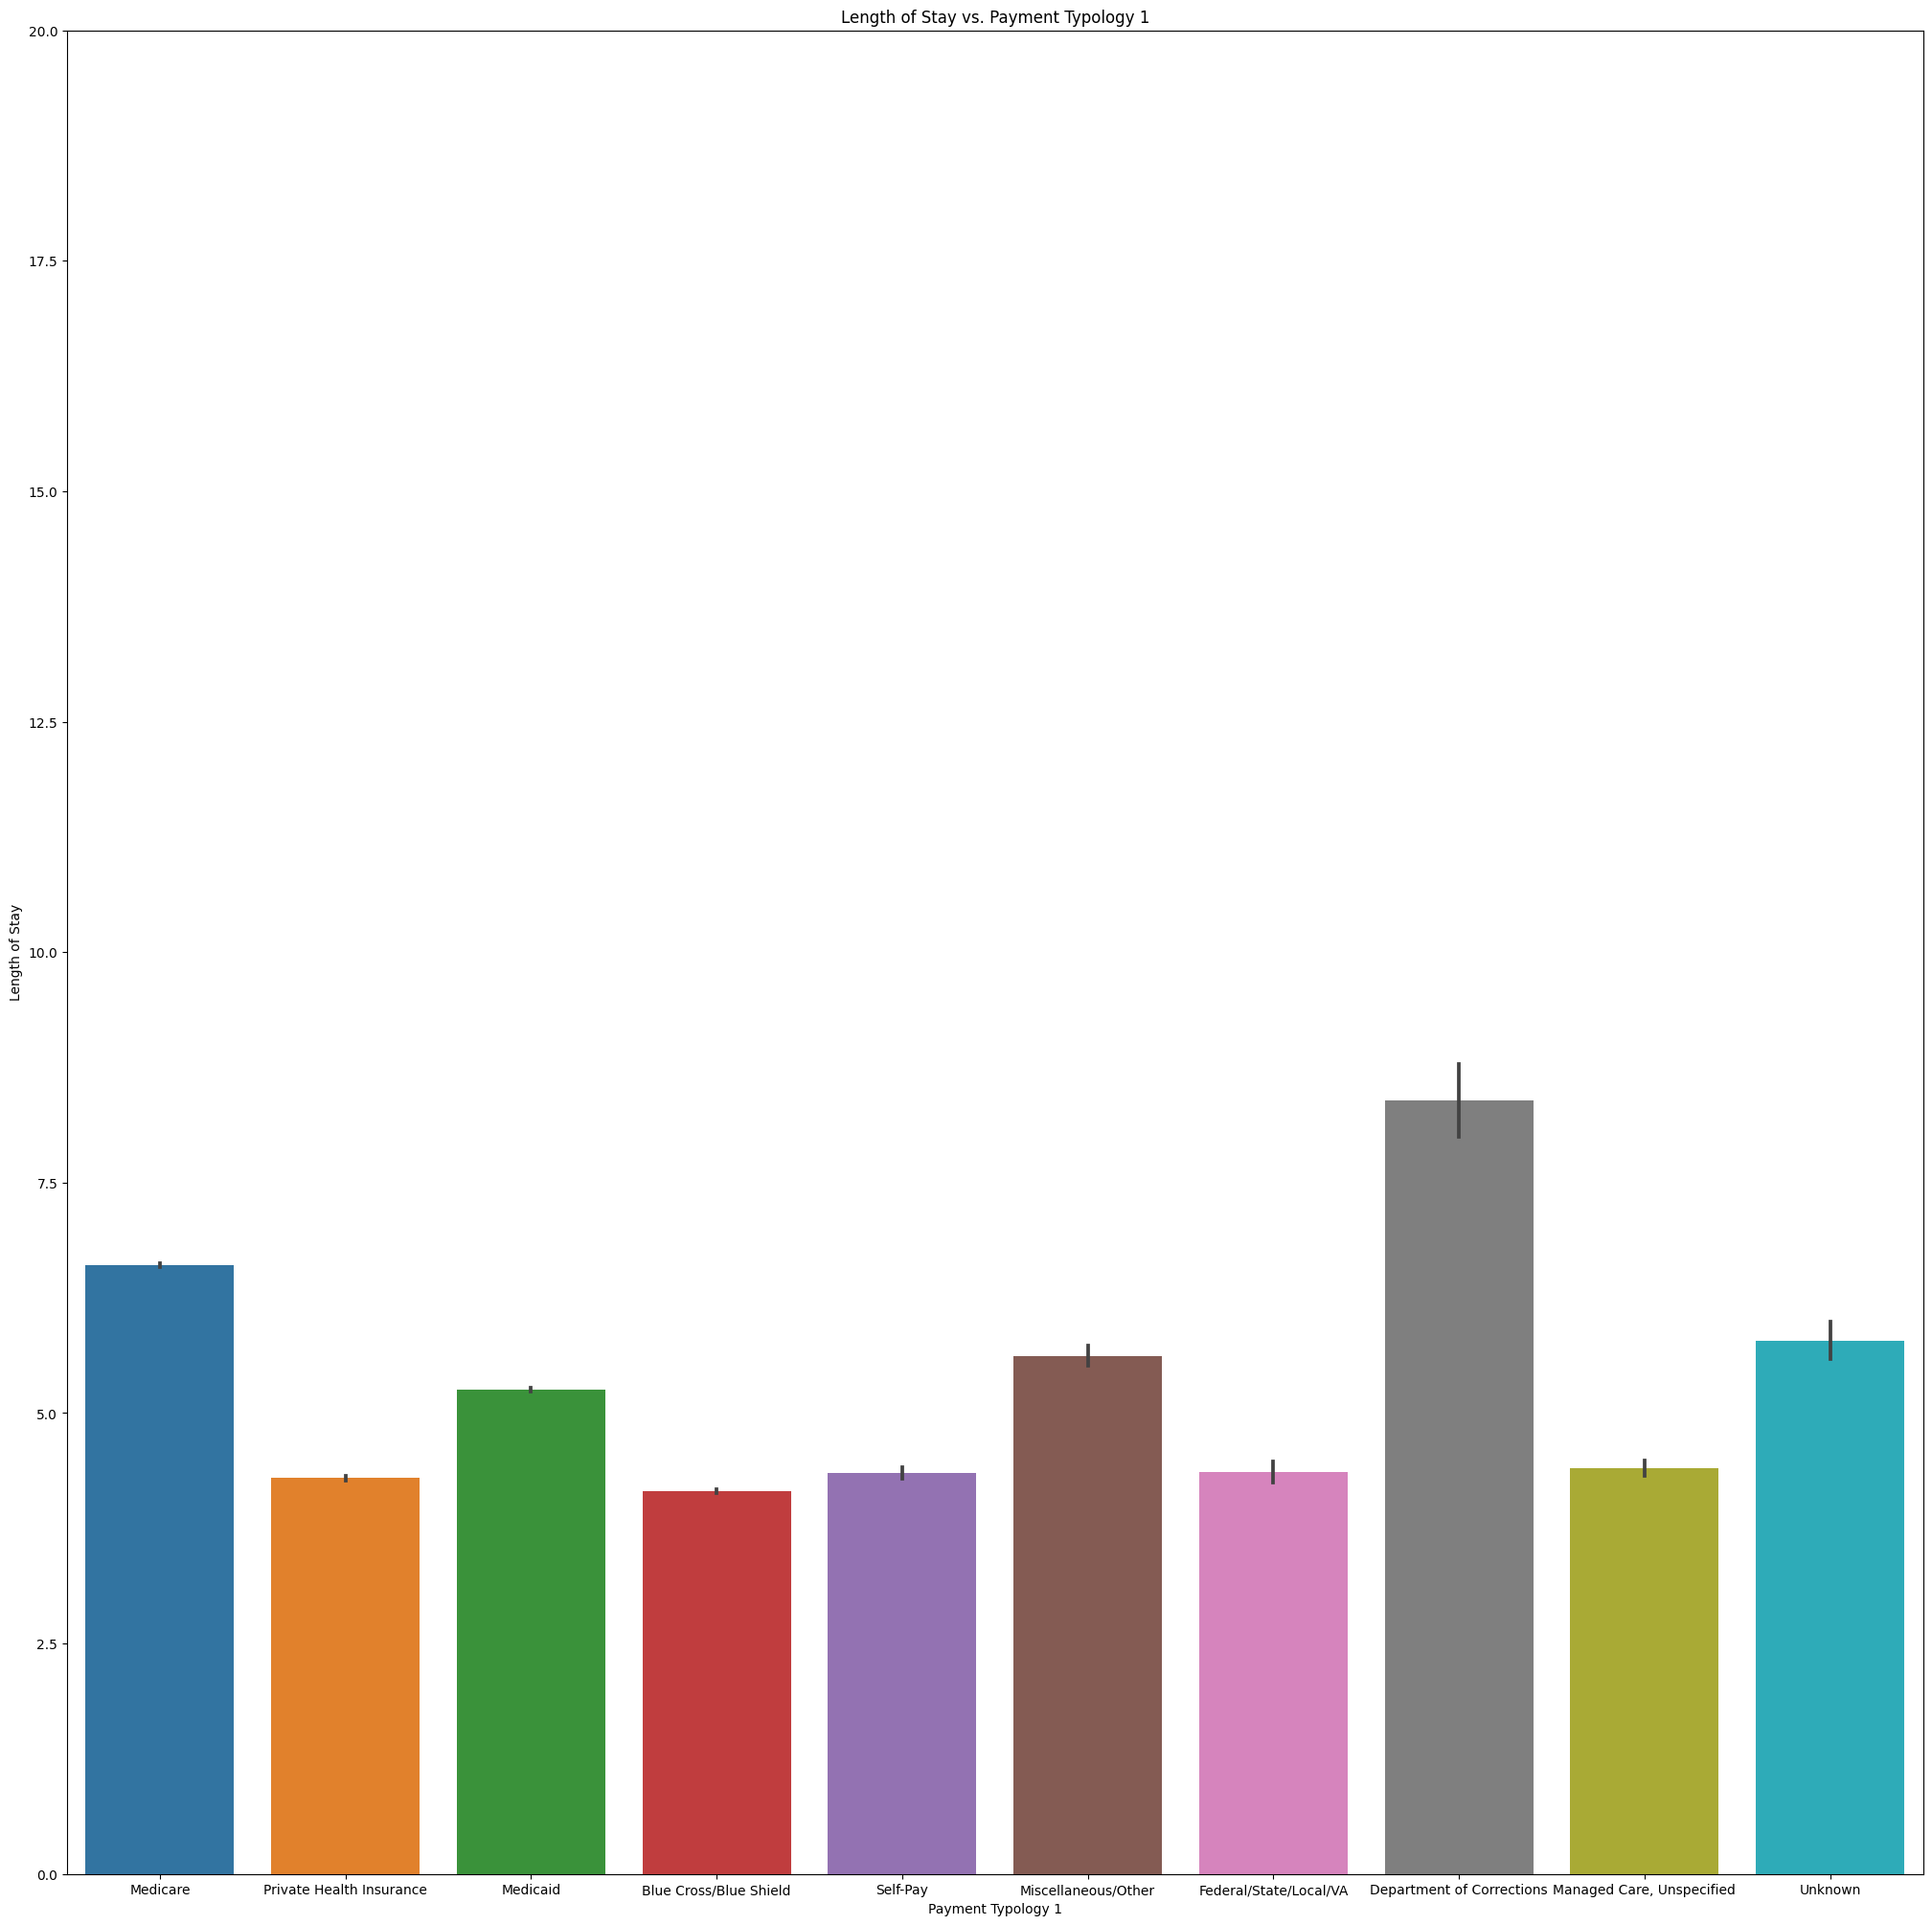

In [ ]:
f, ax = plt.subplots(figsize=(25,25))
sns.barplot(x="Payment Typology 1", y="Length of Stay", data=df)
ax.set(ylim=(0,20))
plt.title("Length of Stay vs. Payment Typology 1")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
sns.distplot(x="")

# Data Preparation

In [8]:
df = df.drop(["Facility Id", "Total Charges", "Total Costs", "Health Service Area", "Hospital County","Zip Code - 3 digits", "Race", "Ethnicity", "Patient Disposition", "Birth Weight", "Payment Typology 3", "Payment Typology 2", "Operating Certificate Number","Facility Name", "Gender", "CCS Diagnosis Description", "CCS Procedure Description", "APR DRG Description", "APR MDC Description", "APR Severity of Illness Description", "APR Medical Surgical Description", "Abortion Edit Indicator", "Discharge Year"], axis = 1)

In [9]:
df = df.dropna(subset=['APR Risk of Mortality'])

In [10]:
bins = [0,6,12,30,120]
labels = [6,12,30,120]
df['stay_bin'] = pd.cut(x = df['Length of Stay'], bins = bins)
df['stay_label'] = pd.cut(x = df['Length of Stay'], bins = bins, labels = labels)
df['stay_bin'] = df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
df['stay_bin'] = df['stay_bin'].apply(lambda x: str(x).replace('120','120+'))
df.head()

,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator,stay_bin,stay_label
0,70 or Older,4,Urgent,122,0,139,4,2,Minor,Medicare,Y,(0 - 6],6
1,70 or Older,4,Elective,55,0,422,10,2,Moderate,Medicare,Y,(0 - 6],6
2,70 or Older,4,Urgent,122,202,139,4,1,Minor,Medicare,Y,(0 - 6],6
3,50 to 69,2,Elective,55,0,249,6,2,Minor,Medicare,Y,(0 - 6],6
4,70 or Older,2,Elective,122,0,139,4,1,Moderate,Medicare,Y,(0 - 6],6


In [24]:
new_X = df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = df[['stay_label']]

# Extract Features

In [31]:
cats = new_X.select_dtypes(exclude=np.number).columns.tolist()
dogs = new_y.select_dtypes(exclude=np.number).columns.tolist()

# Converting Columns to dtype "category"

In [37]:
for col in cats:
   new_X[col] = new_X[col].astype('category')

for col in dogs:
  new_y[col] = new_y[col].astype('int64')

<ipython-input-37-be339f54e7ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_y[col] = new_y[col].astype('int64')


In [33]:
new_X.dtypes

Age Group                         category
Type of Admission                 category
CCS Diagnosis Code                   int64
CCS Procedure Code                   int64
APR DRG Code                         int64
APR MDC Code                         int64
APR Severity of Illness Code         int64
APR Risk of Mortality             category
Payment Typology 1                category
Emergency Department Indicator    category
dtype: object

In [38]:
new_y.dtypes

stay_label    int64
dtype: object

In [39]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

In [40]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [41]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [43]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 12.200
